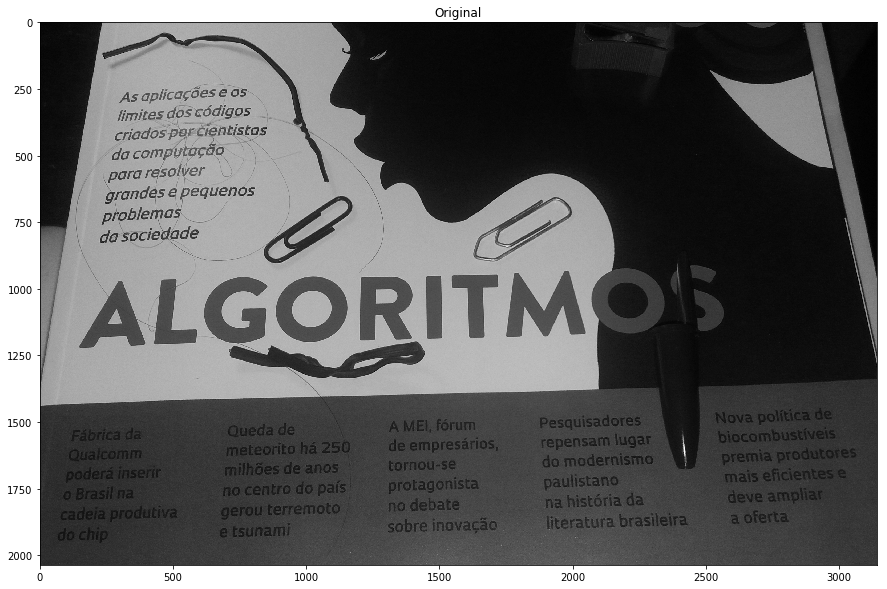

In [63]:

import math
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage 


import siamxt 

original_img = cv2.imread('../EP2/revista_fapesp.png', cv2.IMREAD_GRAYSCALE)
original_img = original_img.astype(np.uint16)

fig, imgs = plt.subplots(1,1, figsize=(15,15))
imgs.imshow(original_img, cmap='gray')
plt.title('Original')
plt.show()

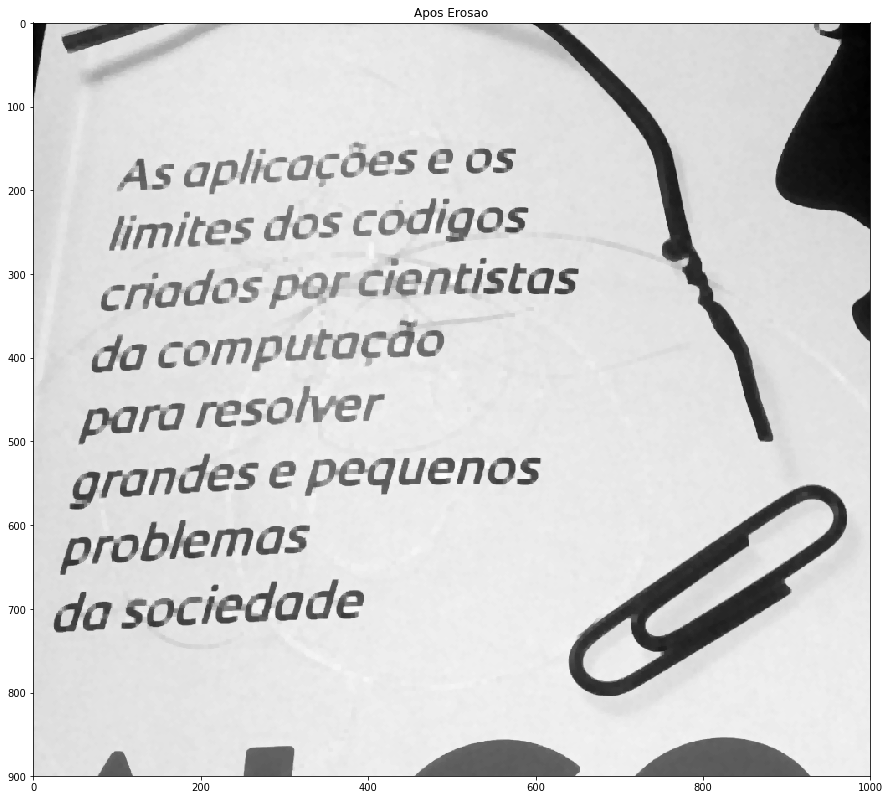

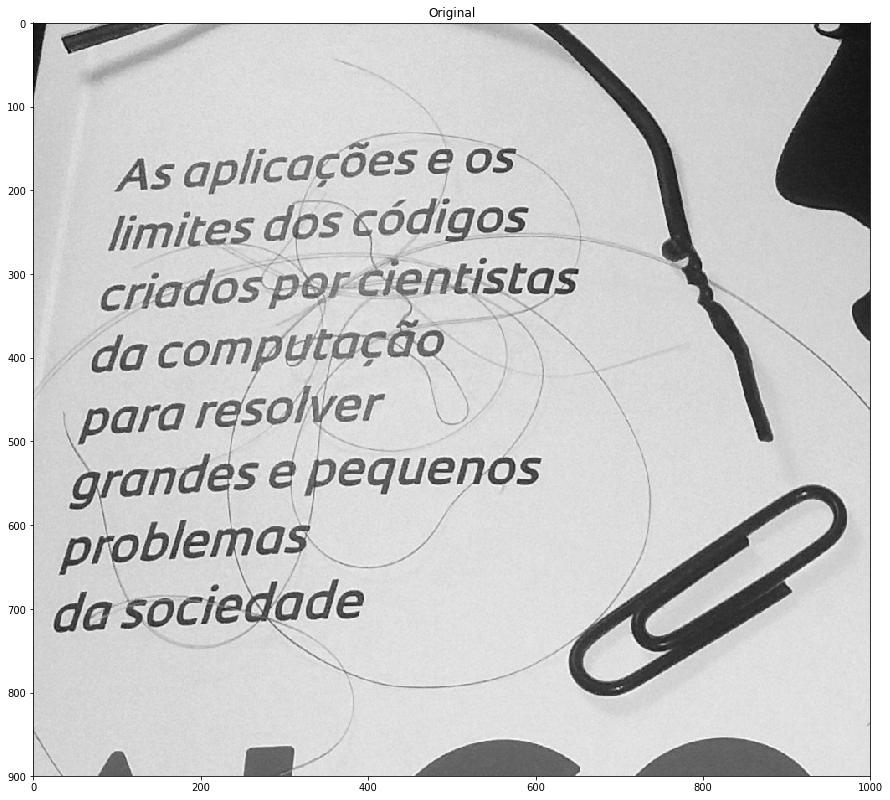

In [64]:
#Removing hair
struct = np.array([
    [False, False, True, False, False],
    [False,  True, True,  True, False],
    [ True,  True, True,  True,  True],
    [False,  True, True,  True, False],
    [False, False, True, False, False]])


after_morph_img = ndimage.grey_closing(original_img, structure=struct)
after_morph_img = ndimage.grey_opening(after_morph_img, structure=struct)

fig, imgs = plt.subplots(1,1, figsize=(15,15))
imgs.imshow(original_img[100:1000,200:1200], cmap='gray')
plt.title('Original')
plt.show()

fig, imgs = plt.subplots(1,1, figsize=(15,15))
imgs.imshow(after_morph_img[100:1000,200:1200], cmap='gray')
plt.title('Resultado da Morfologia')
plt.show()

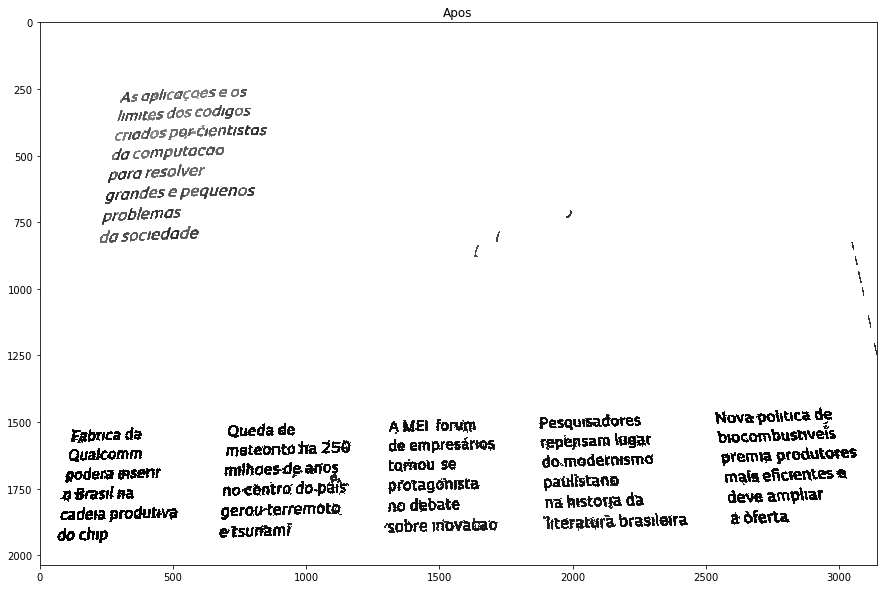

In [29]:
# Neighborhood connectivity-8
neighborhood = np.array([[True, True, True],
                         [True, True, True],
                         [True, True, True]])

img_max = after_morph_img.max()
img_neg = img_max - after_morph_img

mxt_lettters = siamxt.MaxTreeAlpha(img_neg, neighborhood)

#Size and shape thresholds
Wmin, Wmax = 6,48   
Hmin, Hmax = 26,50
rr  = 0.4

#Computing bounding-box lengths from the
#attributes stored in NA
dy = mxt_lettters.node_array[7,:] - mxt_lettters.node_array[6,:]
dx = mxt_lettters.node_array[10,:] - mxt_lettters.node_array[9,:]
area = mxt_lettters.node_array[3,:]
RR = 1.0*area/(dx*dy)

height = mxt_lettters.computeHeight()
gray_var = mxt_lettters.computeNodeGrayVar()

#Selecting nodes that fit the criteria
nodes = (dy > Hmin) & (dy < Hmax) & (dx > Wmin) & (dx < Wmax) & (height > 12) & (gray_var < 800) & (RR > rr)

#Filtering
mxt_lettters.contractDR(nodes)

img_result = img_max - mxt_lettters.getImage()

fig, imgs = plt.subplots(1,1, figsize=(15,15))
imgs.imshow(img_result, cmap='gray')
plt.title('Resultado apos filtro')
plt.show()


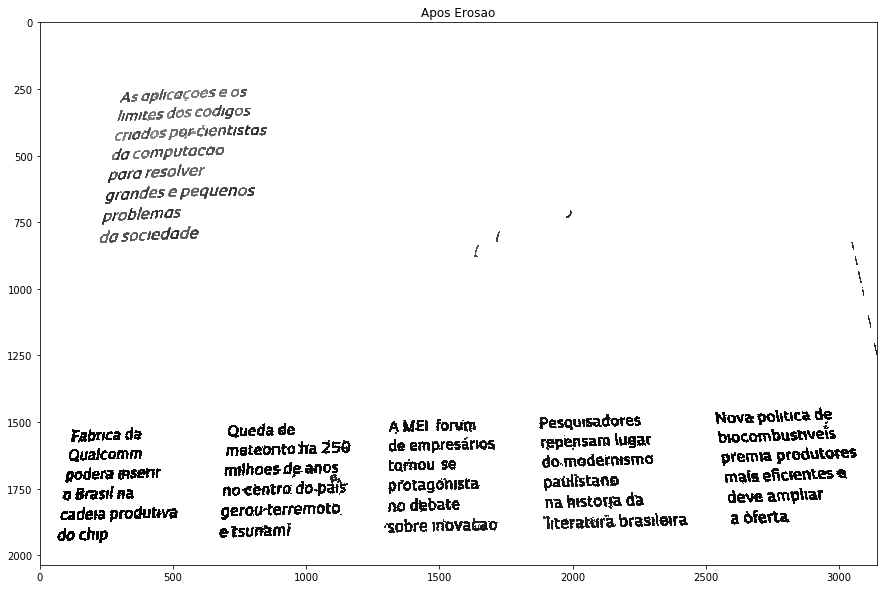

In [56]:
#Removing hair
struct = np.array([
    [False, False, True, False, False],
    [False,  True, True,  True, False],
    [ True,  True, True,  True,  True],
    [False,  True, True,  True, False],
    [False, False, True, False, False]])

final_img = ndimage.grey_dilation(img_result, structure=struct)

final_img = ndimage.grey_erosion(final_img, structure=struct)

fig, imgs = plt.subplots(1,1, figsize=(15,15))
imgs.imshow(final_img, cmap='gray')
plt.title('Apos Erosao')
plt.show()


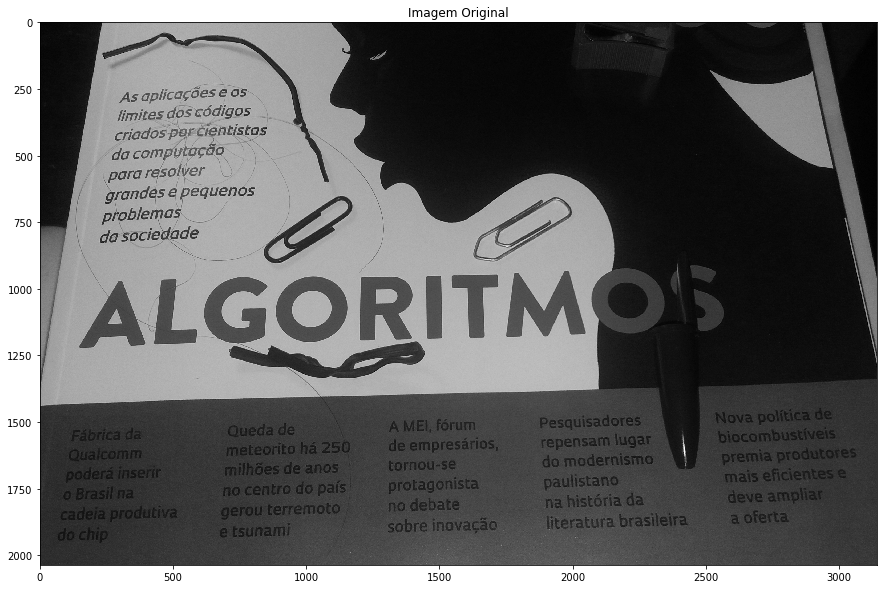

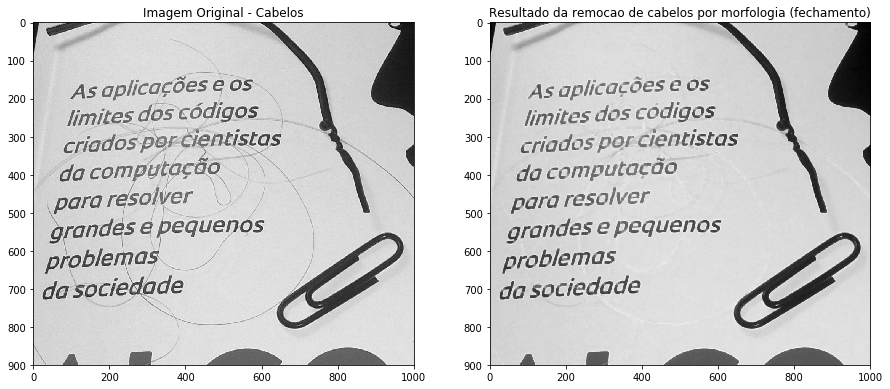

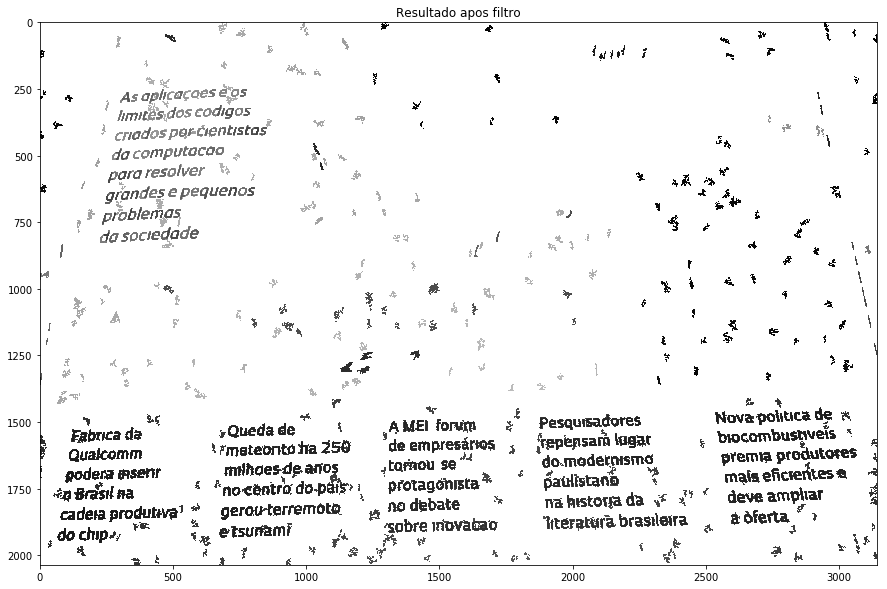

In [75]:

import math
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage 

import siamxt 

original_img = cv2.imread('../EP2/revista_fapesp.png', cv2.IMREAD_GRAYSCALE)
original_img = original_img.astype(np.uint16)

fig, imgs = plt.subplots(1,1, figsize=(15,15))
imgs.imshow(original_img, cmap='gray')
plt.title('Imagem Original')
plt.show()

#Removing hair
struct = np.array([
    [False, False, True, False, False],
    [False,  True, True,  True, False],
    [ True,  True, True,  True,  True],
    [False,  True, True,  True, False],
    [False, False, True, False, False]])


after_morph_img = ndimage.grey_closing(original_img, structure=struct)

fig, imgs = plt.subplots(1,2, figsize=(15,15))
imgs[0].imshow(original_img[100:1000,200:1200], cmap='gray')
imgs[0].set_title('Imagem Original - Cabelos')

imgs[1].imshow(after_morph_img[100:1000,200:1200], cmap='gray')
imgs[1].set_title('Resultado da remocao de cabelos por morfologia (fechamento)')

plt.show()

# Neighborhood connectivity-8
neighborhood = np.array([[True, True, True],
                         [True, True, True],
                         [True, True, True]])

img_max = after_morph_img.max()
img_neg = img_max - after_morph_img

mxt_lettters = siamxt.MaxTreeAlpha(img_neg, neighborhood)

#Size and shape thresholds
Wmin, Wmax = 6,48   
Hmin, Hmax = 26,50
rr  = 0.4

#Computing bounding-box lengths from the
#attributes stored in NA
dy = mxt_lettters.node_array[7,:] - mxt_lettters.node_array[6,:]
dx = mxt_lettters.node_array[10,:] - mxt_lettters.node_array[9,:]
area = mxt_lettters.node_array[3,:]
RR = 1.0*area/(dx*dy)

height = mxt_lettters.computeHeight()
gray_var = mxt_lettters.computeNodeGrayVar()

#Selecting nodes that fit the criteria
nodes = (dy > Hmin) & (dy < Hmax) & (dx > Wmin) & (dx < Wmax) & (gray_var < 800) & (RR > rr)

#Filtering
mxt_lettters.contractDR(nodes)

img_result = img_max - mxt_lettters.getImage()

fig, imgs = plt.subplots(1,1, figsize=(15,15))
imgs.imshow(img_result, cmap='gray')
plt.title('Resultado apos filtro')
plt.show()


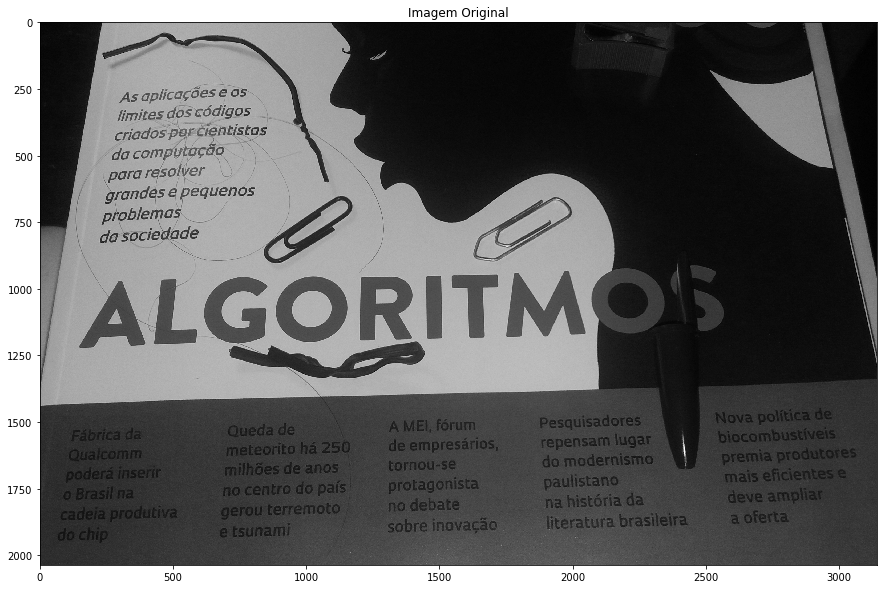

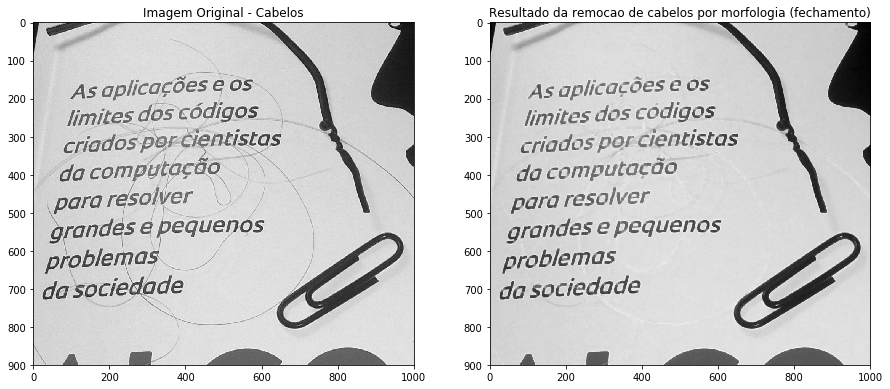

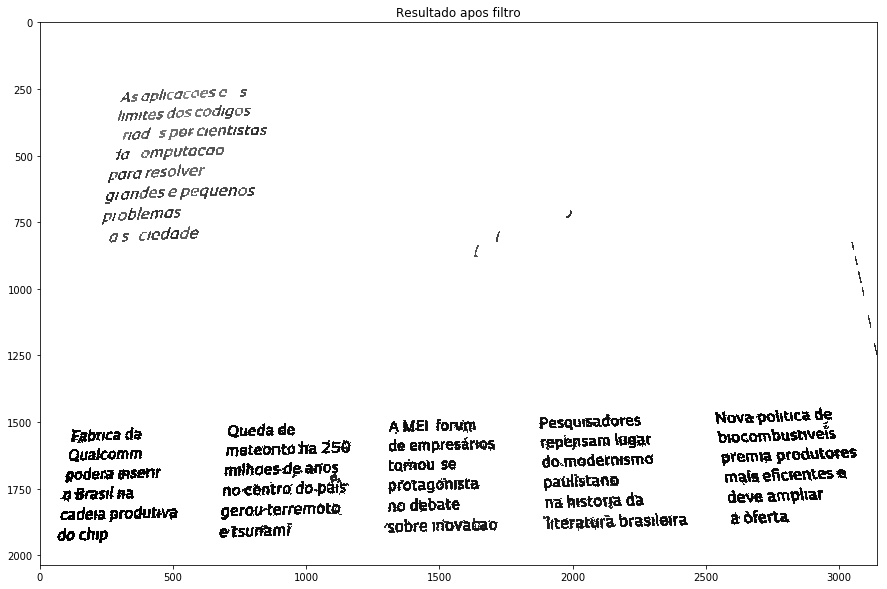

In [78]:

import math
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage 

import siamxt 

original_img = cv2.imread('../EP2/revista_fapesp.png', cv2.IMREAD_GRAYSCALE)
original_img = original_img.astype(np.uint16)

fig, imgs = plt.subplots(1,1, figsize=(15,15))
imgs.imshow(original_img, cmap='gray')
plt.title('Imagem Original')
plt.show()

#Removing hair
struct = np.array([
    [False, False, True, False, False],
    [False,  True, True,  True, False],
    [ True,  True, True,  True,  True],
    [False,  True, True,  True, False],
    [False, False, True, False, False]])


after_morph_img = ndimage.grey_closing(original_img, structure=struct)

fig, imgs = plt.subplots(1,2, figsize=(15,15))
imgs[0].imshow(original_img[100:1000,200:1200], cmap='gray')
imgs[0].set_title('Imagem Original - Cabelos')

imgs[1].imshow(after_morph_img[100:1000,200:1200], cmap='gray')
imgs[1].set_title('Resultado da remocao de cabelos por morfologia (fechamento)')

plt.show()

# Neighborhood connectivity-8
neighborhood = np.array([[True, True, True],
                         [True, True, True],
                         [True, True, True]])

img_max = after_morph_img.max()
img_neg = img_max - after_morph_img

mxt_lettters = siamxt.MaxTreeAlpha(img_neg, neighborhood)

#Size and shape thresholds
Wmin, Wmax = 6,48   
Hmin, Hmax = 26,50
rr  = 0.4

#Computing bounding-box lengths from the
#attributes stored in NA
dy = mxt_lettters.node_array[7,:] - mxt_lettters.node_array[6,:]
dx = mxt_lettters.node_array[10,:] - mxt_lettters.node_array[9,:]
area = mxt_lettters.node_array[3,:]
RR = 1.0*area/(dx*dy)

height = mxt_lettters.computeHeight()
gray_var = mxt_lettters.computeNodeGrayVar()

#Selecting nodes that fit the criteria
nodes = (dy > Hmin) & (dy < Hmax) & (dx > Wmin) & (dx < Wmax) & (height > 12) & (gray_var < 300) & (RR > rr)

#Filtering
mxt_lettters.contractDR(nodes)

img_result = img_max - mxt_lettters.getImage()

fig, imgs = plt.subplots(1,1, figsize=(15,15))
imgs.imshow(img_result, cmap='gray')
plt.title('Resultado apos filtro')
plt.show()
